In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import vizualize as viz

# Data Import
df2=pd.read_csv("/content/scaled_standard_dataset.csv",index_col=0,na_values="??")
df=df2.copy(deep=True)

In [61]:
df.head()

,cardio,age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,...,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,diabetic_1,diabetic_2,diabetic_3
id,,,,,,,,,,,,,,,,,,,,,
42910,1,1.130889,1.366116,-0.547539,-0.641256,-0.993269,-0.030331,0.926505,-0.39493,-0.490972,...,-0.464841,-1.719558,2.511263,-0.361996,0.419795,-0.283148,-0.285981,0.51429,-0.267436,-0.407522
17437,1,1.721620,-0.732002,-1.673232,-0.010864,1.920853,2.014867,-0.540838,-0.39493,-0.490972,...,0.843544,0.581545,-0.398206,-0.361996,0.419795,-0.283148,-0.285981,0.51429,-0.267436,-0.407522
49231,1,-0.493623,-0.732002,0.453077,-0.991474,0.172380,-0.137973,-0.540838,-0.39493,-0.490972,...,-1.212490,0.581545,-0.398206,-0.361996,0.419795,-0.283148,-0.285981,0.51429,-0.267436,-0.407522
6221,1,-0.493623,1.366116,1.328616,1.460051,-0.410445,0.938447,-0.540838,-0.39493,-0.490972,...,0.656631,0.581545,-0.398206,-0.361996,0.419795,-0.283148,-0.285981,0.51429,-0.267436,-0.407522
2934,0,0.097109,-0.732002,-0.047231,-1.061518,-0.993269,-1.214393,-0.540838,-0.39493,-0.490972,...,-1.025578,0.581545,-0.398206,-0.361996,0.419795,-0.283148,-0.285981,0.51429,-0.267436,-0.407522


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55792 entries, 42910 to 22642
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cardio         55792 non-null  int64  
 1   age            55792 non-null  float64
 2   gender         55792 non-null  float64
 3   height         55792 non-null  float64
 4   weight         55792 non-null  float64
 5   bp_high        55792 non-null  float64
 6   bp_lo          55792 non-null  float64
 7   cholesterol    55792 non-null  float64
 8   gluc           55792 non-null  float64
 9   diabetic       55792 non-null  float64
 10  smoke          55792 non-null  float64
 11  alco           55792 non-null  float64
 12  active         55792 non-null  float64
 13  height_m       55792 non-null  float64
 14  bmi            55792 non-null  float64
 15  cholesterol_1  55792 non-null  float64
 16  cholesterol_2  55792 non-null  float64
 17  cholesterol_3  55792 non-null  float64
 18  gl

In [63]:
df.isnull().sum()

cardio           0
age              0
gender           0
height           0
weight           0
bp_high          0
bp_lo            0
cholesterol      0
gluc             0
diabetic         0
smoke            0
alco             0
active           0
height_m         0
bmi              0
cholesterol_1    0
cholesterol_2    0
cholesterol_3    0
gluc_1           0
gluc_2           0
gluc_3           0
diabetic_1       0
diabetic_2       0
diabetic_3       0
dtype: int64

In [64]:
df.describe(include='all')

,cardio,age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,...,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,diabetic_1,diabetic_2,diabetic_3
count,55792.000000,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,...,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04,5.579200e+04
mean,0.500430,4.999983e-16,2.024955e-16,2.980123e-17,3.082007e-17,7.386629e-17,-6.120077e-16,1.502797e-16,2.311505e-16,6.227692e-17,...,-2.543929e-16,7.437571e-17,3.680579e-17,9.080459e-17,-6.062130e-17,-3.056536e-18,4.584804e-17,-3.820670e-19,6.724379e-17,4.508391e-17
std,0.500004,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,0.000000,-3.447279e+00,-7.320023e-01,-9.177850e+00,-3.092781e+00,-3.324567e+00,-3.367234e+00,-5.408382e-01,-3.949302e-01,-4.909719e-01,...,-3.081611e+00,-1.719558e+00,-3.982060e-01,-3.619961e-01,-2.382117e+00,-2.831478e-01,-2.859815e-01,-1.944429e+00,-2.674357e-01,-4.075224e-01
25%,0.000000,-7.889882e-01,-7.320023e-01,-6.726161e-01,-6.412561e-01,-4.104446e-01,-1.379732e-01,-5.408382e-01,-3.949302e-01,-4.909719e-01,...,-6.517536e-01,-1.719558e+00,-3.982060e-01,-3.619961e-01,4.197946e-01,-2.831478e-01,-2.859815e-01,5.142897e-01,-2.674357e-01,-4.075224e-01
50%,1.000000,9.710876e-02,-7.320023e-01,7.784580e-02,-1.509512e-01,-4.104446e-01,-1.379732e-01,-5.408382e-01,-3.949302e-01,-4.909719e-01,...,-2.779293e-01,5.815448e-01,-3.982060e-01,-3.619961e-01,4.197946e-01,-2.831478e-01,-2.859815e-01,5.142897e-01,-2.674357e-01,-4.075224e-01
75%,1.000000,6.878401e-01,1.366116e+00,7.032307e-01,5.494845e-01,7.552044e-01,9.384469e-01,9.265050e-01,-3.949302e-01,-4.909719e-01,...,4.697193e-01,5.815448e-01,-3.982060e-01,-3.619961e-01,4.197946e-01,-2.831478e-01,-2.859815e-01,5.142897e-01,-2.674357e-01,-4.075224e-01
max,1.000000,1.721620e+00,1.366116e+00,5.331079e+00,8.814625e+00,6.583449e+00,4.167707e+00,2.393848e+00,3.108917e+00,2.301881e+00,...,2.233844e+01,5.815448e-01,2.511263e+00,2.762461e+00,4.197946e-01,3.531724e+00,3.496730e+00,5.142897e-01,3.739217e+00,2.453853e+00


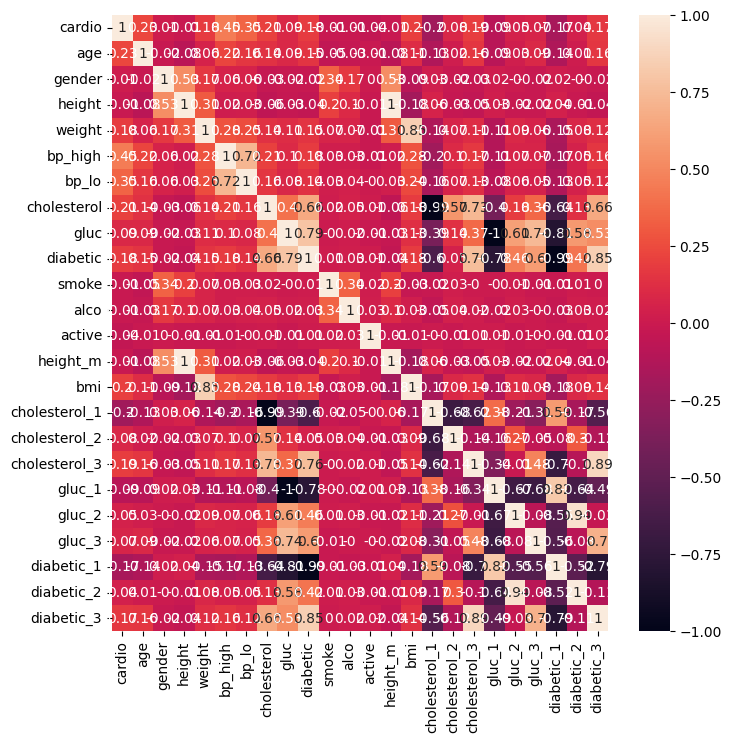

In [70]:
raw_correl=df.corr(method='spearman').round(2)
viz.heatmap(raw_correl)

In [78]:
threshold=0.11
relative_correl=raw_correl['cardio']
raw_cols=relative_correl[abs(relative_correl)>threshold].index.tolist()
raw_features=df[raw_cols]
raw_features.head()

,cardio,age,weight,bp_high,bp_lo,cholesterol,diabetic,bmi,cholesterol_1,cholesterol_3,diabetic_1,diabetic_3
id,,,,,,,,,,,,
42910,1,1.130889,-0.641256,-0.993269,-0.030331,0.926505,-0.490972,-0.464841,-1.719558,-0.361996,0.51429,-0.407522
17437,1,1.721620,-0.010864,1.920853,2.014867,-0.540838,-0.490972,0.843544,0.581545,-0.361996,0.51429,-0.407522
49231,1,-0.493623,-0.991474,0.172380,-0.137973,-0.540838,-0.490972,-1.212490,0.581545,-0.361996,0.51429,-0.407522
6221,1,-0.493623,1.460051,-0.410445,0.938447,-0.540838,-0.490972,0.656631,0.581545,-0.361996,0.51429,-0.407522
2934,0,0.097109,-1.061518,-0.993269,-1.214393,-0.540838,-0.490972,-1.025578,0.581545,-0.361996,0.51429,-0.407522


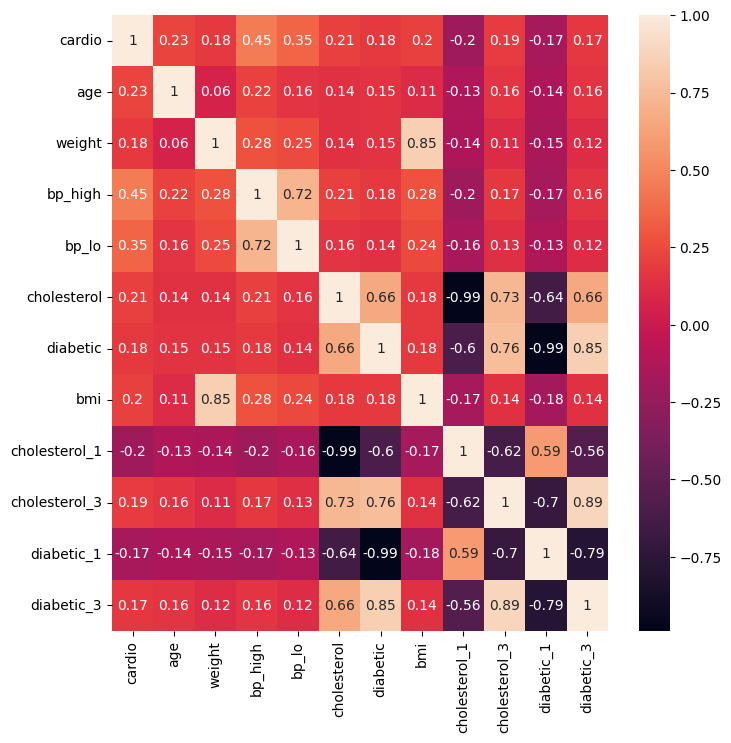

In [79]:
new_correl=raw_features.corr(method='spearman').round(2)
viz.heatmap(new_correl)

In [ ]:
for col in raw_cols:
  viz.histplot(df[col])

In [85]:
def scatter(col):
  plt.figure(figsize = (8,8))
  sns.scatterplot(data= raw_features, x= col, y = raw_features.cardio)
  plt.show()

In [ ]:
for cols in raw_cols:
  scatter(cols)

In [87]:
raw_features.head()

,cardio,age,weight,bp_high,bp_lo,cholesterol,diabetic,bmi,cholesterol_1,cholesterol_3,diabetic_1,diabetic_3
id,,,,,,,,,,,,
42910,1,1.130889,-0.641256,-0.993269,-0.030331,0.926505,-0.490972,-0.464841,-1.719558,-0.361996,0.51429,-0.407522
17437,1,1.721620,-0.010864,1.920853,2.014867,-0.540838,-0.490972,0.843544,0.581545,-0.361996,0.51429,-0.407522
49231,1,-0.493623,-0.991474,0.172380,-0.137973,-0.540838,-0.490972,-1.212490,0.581545,-0.361996,0.51429,-0.407522
6221,1,-0.493623,1.460051,-0.410445,0.938447,-0.540838,-0.490972,0.656631,0.581545,-0.361996,0.51429,-0.407522
2934,0,0.097109,-1.061518,-0.993269,-1.214393,-0.540838,-0.490972,-1.025578,0.581545,-0.361996,0.51429,-0.407522


In [93]:
raw_features.to_csv("feature_extracted_raw.csv")